In [9]:
from xgboost import XGBClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
import pandas as pd
df = pd.read_csv('./All.csv')
df = df.sample(frac=1)


<BarContainer object of 5 artists>

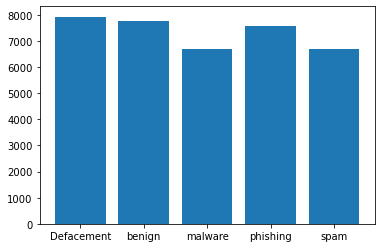

In [15]:
import matplotlib.pyplot as plt
labels,counts = np.unique(df["URL_Type_obf_Type"],return_counts=True)
plt.bar(labels,counts)

In [43]:
nans[(nans < 1000) & (nans > 0)]

avgpathtokenlen             280
NumberRate_DirectoryName     10
NumberRate_FileName          10
NumberRate_AfterPath          3
Entropy_Filename            236
Entropy_Extension            40
Entropy_Afterpath             6
dtype: int64

In [44]:
nans = df.isna().sum()
df = df.drop(list(nans[nans > 5000].index),axis=1)
df = df.dropna()
df

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
12666,0,2,17,3.500000,4,4.941176,2,31,25,0,...,1,0,0,-1,0.611724,0.916667,0.623330,0.000000,-1.000000,benign
10086,12,2,9,6.500000,10,4.333334,2,13,7,1,...,3,3,2,1,0.745273,0.887436,0.881071,0.884088,0.900880,benign
5296,53,3,16,6.000000,13,2.666667,3,23,12,0,...,-1,-1,-1,-1,0.708451,0.745484,-1.000000,-1.000000,-1.000000,Defacement
32724,29,4,14,5.750000,12,3.666667,4,17,22,3,...,11,3,2,7,0.704049,0.791265,0.706663,0.665256,0.796205,spam
22825,10,2,11,12.000000,22,3.333333,2,17,18,14,...,9,0,0,4,0.689956,0.728590,0.641068,0.000000,0.727919,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26949,0,3,3,6.333334,13,7.666666,3,9,6,2,...,1,0,0,-1,0.753500,0.801985,1.000000,0.000000,-1.000000,phishing
23220,0,2,5,5.000000,7,18.400000,2,8,7,12,...,3,0,0,-1,0.771971,0.684657,0.812689,0.000000,-1.000000,phishing
10173,0,2,12,3.500000,4,3.750000,2,15,9,0,...,1,0,0,-1,0.660523,0.916667,0.649105,0.000000,-1.000000,benign
11467,0,2,7,3.000000,3,5.428571,2,17,14,0,...,2,3,2,-1,0.659619,0.898227,0.737035,0.786351,-1.000000,benign


In [77]:
df['URL_Type_obf_Type'] = pd.Categorical(df['URL_Type_obf_Type'])
df['URL_Type_obf_Type'] = df['URL_Type_obf_Type'].cat.codes
X = df.drop(['URL_Type_obf_Type'], axis=1)
y = df['URL_Type_obf_Type']
X = X.to_numpy()
y = y.to_numpy()

In [78]:
X.shape,y.shape

((36133, 77), (36133,))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [48]:
weights = pd.Series(y_train).value_counts().values / y_train.size
all_weights = np.zeros(y_train.size)
for label in np.unique(y_train):
    all_weights[y_train == label] = weights[label]

In [49]:
all_weights

array([0.20153757, 0.18604651, 0.20153757, ..., 0.2159139 , 0.20153757,
       0.2159139 ])

In [ ]:

xgb = XGBClassifier(n_estimators=5000, learning_rate=0.05, gamma=0, subsample=0.7,
                            objective="multi:softprob",
                            num_class=len(np.unique(y_train)),
                            eval_metric="mlogloss", random_state=93, use_label_encoder=False)
xgb = xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
                        early_stopping_rounds=10,
                        sample_weight=all_weights)

[11:13:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:1.52425	validation_1-mlogloss:1.52489
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.45092	validation_1-mlogloss:1.45222
[2]	validation_0-mlogloss:1.38367	validation_1-mlogloss:1.38539
[3]	validation_0-mlogloss:1.32165	validation_1-mlogloss:1.32401
[4]	validation_0-mlogloss:1.26374	validation_1-mlogloss:1.26692
[5]	validation_0-mlogloss:1.21208	validation_1-mlogloss:1.21580
[6]	validation_0-mlogloss:1.16401	validation_1-mlogloss:1.16853
[7]	validation_0-m

In [ ]:
# predict classification report
y_pred = xgb.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))

In [ ]:
import pickle
with open("xgb_good", "wb") as file:
    pickle.dump(xgb, file)

In [107]:
# strategy = tf.distribute.MirroredStrategy()
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten
model = Sequential()
model.add(Dense(60, activation="relu",input_shape=(77,)))
model.add(Dropout(0.3))
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(5, activation="softmax"))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 60)                4680      
_________________________________________________________________
dropout_8 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_34 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 80        
Total params: 7,055
Trainable params: 7,055
Non-trainable params: 0
_________________________________________________________________


In [105]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
y = np_utils.to_categorical(LabelEncoder().fit_transform(y_train))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [109]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = model.fit(X_train,y_train,batch_size=200,epochs=2500,
                    validation_split=0.05,
                    use_multiprocessing=True,workers=8,callbacks=[callback])

Epoch 1/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.8822 - accuracy: 0.6761 - recall_8: 0.5371 - precision_8: 0.7871 - val_loss: 0.7238 - val_accuracy: 0.7456 - val_recall_8: 0.6564 - val_precision_8: 0.8439
Epoch 2/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.8225 - accuracy: 0.6980 - recall_8: 0.5828 - precision_8: 0.7999 - val_loss: 0.6792 - val_accuracy: 0.7586 - val_recall_8: 0.6672 - val_precision_8: 0.8493
Epoch 3/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.7729 - accuracy: 0.7166 - recall_8: 0.6126 - precision_8: 0.8051 - val_loss: 0.6318 - val_accuracy: 0.7802 - val_recall_8: 0.6879 - val_precision_8: 0.8516
Epoch 4/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.7357 - accuracy: 0.7331 - recall_8: 0.6387 - precision_8: 0.8166 - val_loss: 0.5973 - val_accuracy: 0.7871 - val_recall_8: 0.7056 - val_precision_8: 0.8628
Epoch 5/2500
124/124 [==============================] - 1s 4ms/s

Epoch 36/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.3817 - accuracy: 0.8617 - recall_8: 0.8331 - precision_8: 0.8912 - val_loss: 0.2885 - val_accuracy: 0.8932 - val_recall_8: 0.8824 - val_precision_8: 0.9162
Epoch 37/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.3791 - accuracy: 0.8672 - recall_8: 0.8379 - precision_8: 0.8935 - val_loss: 0.2924 - val_accuracy: 0.9024 - val_recall_8: 0.8816 - val_precision_8: 0.9220
Epoch 38/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.3722 - accuracy: 0.8662 - recall_8: 0.8383 - precision_8: 0.8944 - val_loss: 0.2780 - val_accuracy: 0.9085 - val_recall_8: 0.8932 - val_precision_8: 0.9274
Epoch 39/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.3643 - accuracy: 0.8665 - recall_8: 0.8388 - precision_8: 0.8953 - val_loss: 0.2634 - val_accuracy: 0.9070 - val_recall_8: 0.8932 - val_precision_8: 0.9274
Epoch 40/2500
124/124 [==============================] - 0s 

Epoch 71/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.3208 - accuracy: 0.8852 - recall_8: 0.8645 - precision_8: 0.9083 - val_loss: 0.2455 - val_accuracy: 0.9154 - val_recall_8: 0.9062 - val_precision_8: 0.9283
Epoch 72/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.3164 - accuracy: 0.8860 - recall_8: 0.8654 - precision_8: 0.9077 - val_loss: 0.2421 - val_accuracy: 0.9262 - val_recall_8: 0.9116 - val_precision_8: 0.9383
Epoch 73/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.3099 - accuracy: 0.8899 - recall_8: 0.8696 - precision_8: 0.9117 - val_loss: 0.2467 - val_accuracy: 0.9201 - val_recall_8: 0.9116 - val_precision_8: 0.9331
Epoch 74/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.3213 - accuracy: 0.8826 - recall_8: 0.8623 - precision_8: 0.9067 - val_loss: 0.2484 - val_accuracy: 0.9185 - val_recall_8: 0.9001 - val_precision_8: 0.9323
Epoch 75/2500
124/124 [==============================] - 1s 

Epoch 106/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2973 - accuracy: 0.8935 - recall_8: 0.8770 - precision_8: 0.9135 - val_loss: 0.2378 - val_accuracy: 0.9116 - val_recall_8: 0.8962 - val_precision_8: 0.9283
Epoch 107/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.2921 - accuracy: 0.8945 - recall_8: 0.8760 - precision_8: 0.9139 - val_loss: 0.2190 - val_accuracy: 0.9201 - val_recall_8: 0.9108 - val_precision_8: 0.9338
Epoch 108/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.2818 - accuracy: 0.8995 - recall_8: 0.8829 - precision_8: 0.9172 - val_loss: 0.2205 - val_accuracy: 0.9239 - val_recall_8: 0.9139 - val_precision_8: 0.9377
Epoch 109/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2835 - accuracy: 0.8985 - recall_8: 0.8815 - precision_8: 0.9158 - val_loss: 0.2134 - val_accuracy: 0.9224 - val_recall_8: 0.9147 - val_precision_8: 0.9415
Epoch 110/2500
124/124 [==============================] 

Epoch 141/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2672 - accuracy: 0.9040 - recall_8: 0.8890 - precision_8: 0.9208 - val_loss: 0.2038 - val_accuracy: 0.9331 - val_recall_8: 0.9239 - val_precision_8: 0.9427
Epoch 142/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.9019 - recall_8: 0.8856 - precision_8: 0.9195 - val_loss: 0.2190 - val_accuracy: 0.9239 - val_recall_8: 0.9185 - val_precision_8: 0.9336
Epoch 143/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.9049 - recall_8: 0.8893 - precision_8: 0.9210 - val_loss: 0.2033 - val_accuracy: 0.9285 - val_recall_8: 0.9178 - val_precision_8: 0.9416
Epoch 144/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2657 - accuracy: 0.9054 - recall_8: 0.8886 - precision_8: 0.9215 - val_loss: 0.2193 - val_accuracy: 0.9254 - val_recall_8: 0.9139 - val_precision_8: 0.9347
Epoch 145/2500
124/124 [==============================] 

Epoch 176/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2591 - accuracy: 0.9054 - recall_8: 0.8917 - precision_8: 0.9200 - val_loss: 0.1963 - val_accuracy: 0.9316 - val_recall_8: 0.9216 - val_precision_8: 0.9441
Epoch 177/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.2525 - accuracy: 0.9090 - recall_8: 0.8948 - precision_8: 0.9248 - val_loss: 0.1923 - val_accuracy: 0.9285 - val_recall_8: 0.9193 - val_precision_8: 0.9395
Epoch 178/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2531 - accuracy: 0.9117 - recall_8: 0.8979 - precision_8: 0.9264 - val_loss: 0.2111 - val_accuracy: 0.9239 - val_recall_8: 0.9154 - val_precision_8: 0.9393
Epoch 179/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.9105 - recall_8: 0.8961 - precision_8: 0.9249 - val_loss: 0.2019 - val_accuracy: 0.9339 - val_recall_8: 0.9216 - val_precision_8: 0.9456
Epoch 180/2500
124/124 [==============================] 

Epoch 211/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2458 - accuracy: 0.9139 - recall_8: 0.9003 - precision_8: 0.9263 - val_loss: 0.1894 - val_accuracy: 0.9331 - val_recall_8: 0.9224 - val_precision_8: 0.9456
Epoch 212/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.2468 - accuracy: 0.9108 - recall_8: 0.8990 - precision_8: 0.9251 - val_loss: 0.1865 - val_accuracy: 0.9393 - val_recall_8: 0.9347 - val_precision_8: 0.9500
Epoch 213/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.9111 - recall_8: 0.8991 - precision_8: 0.9249 - val_loss: 0.1923 - val_accuracy: 0.9301 - val_recall_8: 0.9231 - val_precision_8: 0.9405
Epoch 214/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2439 - accuracy: 0.9141 - recall_8: 0.9016 - precision_8: 0.9283 - val_loss: 0.2036 - val_accuracy: 0.9254 - val_recall_8: 0.9139 - val_precision_8: 0.9422
Epoch 215/2500
124/124 [==============================] 

Epoch 246/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2381 - accuracy: 0.9137 - recall_8: 0.9020 - precision_8: 0.9276 - val_loss: 0.1889 - val_accuracy: 0.9385 - val_recall_8: 0.9301 - val_precision_8: 0.9513
Epoch 247/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2384 - accuracy: 0.9139 - recall_8: 0.9033 - precision_8: 0.9261 - val_loss: 0.1969 - val_accuracy: 0.9270 - val_recall_8: 0.9216 - val_precision_8: 0.9441
Epoch 248/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.2411 - accuracy: 0.9131 - recall_8: 0.9005 - precision_8: 0.9277 - val_loss: 0.1847 - val_accuracy: 0.9362 - val_recall_8: 0.9277 - val_precision_8: 0.9444
Epoch 249/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.2434 - accuracy: 0.9126 - recall_8: 0.8997 - precision_8: 0.9249 - val_loss: 0.1832 - val_accuracy: 0.9408 - val_recall_8: 0.9331 - val_precision_8: 0.9514
Epoch 250/2500
124/124 [==============================] 

Epoch 281/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2351 - accuracy: 0.9173 - recall_8: 0.9057 - precision_8: 0.9295 - val_loss: 0.1825 - val_accuracy: 0.9370 - val_recall_8: 0.9277 - val_precision_8: 0.9489
Epoch 282/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2395 - accuracy: 0.9151 - recall_8: 0.9031 - precision_8: 0.9276 - val_loss: 0.1877 - val_accuracy: 0.9316 - val_recall_8: 0.9262 - val_precision_8: 0.9473
Epoch 283/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2245 - accuracy: 0.9195 - recall_8: 0.9071 - precision_8: 0.9308 - val_loss: 0.1903 - val_accuracy: 0.9277 - val_recall_8: 0.9216 - val_precision_8: 0.9389
Epoch 284/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.9188 - recall_8: 0.9071 - precision_8: 0.9317 - val_loss: 0.1776 - val_accuracy: 0.9377 - val_recall_8: 0.9293 - val_precision_8: 0.9512
Epoch 285/2500
124/124 [==============================] 

Epoch 316/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2296 - accuracy: 0.9170 - recall_8: 0.9061 - precision_8: 0.9297 - val_loss: 0.1758 - val_accuracy: 0.9439 - val_recall_8: 0.9377 - val_precision_8: 0.9524
Epoch 317/2500
124/124 [==============================] - 1s 4ms/step - loss: 0.2224 - accuracy: 0.9186 - recall_8: 0.9073 - precision_8: 0.9311 - val_loss: 0.1793 - val_accuracy: 0.9439 - val_recall_8: 0.9362 - val_precision_8: 0.9508
Epoch 318/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2294 - accuracy: 0.9183 - recall_8: 0.9073 - precision_8: 0.9305 - val_loss: 0.1898 - val_accuracy: 0.9362 - val_recall_8: 0.9285 - val_precision_8: 0.9519
Epoch 319/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2244 - accuracy: 0.9194 - recall_8: 0.9094 - precision_8: 0.9306 - val_loss: 0.1858 - val_accuracy: 0.9393 - val_recall_8: 0.9262 - val_precision_8: 0.9488
Epoch 320/2500
124/124 [==============================] 

Epoch 351/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9205 - recall_8: 0.9098 - precision_8: 0.9319 - val_loss: 0.1821 - val_accuracy: 0.9285 - val_recall_8: 0.9247 - val_precision_8: 0.9391
Epoch 352/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.9207 - recall_8: 0.9110 - precision_8: 0.9317 - val_loss: 0.1717 - val_accuracy: 0.9370 - val_recall_8: 0.9301 - val_precision_8: 0.9483
Epoch 353/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2217 - accuracy: 0.9202 - recall_8: 0.9088 - precision_8: 0.9309 - val_loss: 0.1709 - val_accuracy: 0.9439 - val_recall_8: 0.9370 - val_precision_8: 0.9516
Epoch 354/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2218 - accuracy: 0.9200 - recall_8: 0.9102 - precision_8: 0.9315 - val_loss: 0.1722 - val_accuracy: 0.9400 - val_recall_8: 0.9331 - val_precision_8: 0.9529
Epoch 355/2500
124/124 [==============================] 

Epoch 386/2500
124/124 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.9223 - recall_8: 0.9126 - precision_8: 0.9324 - val_loss: 0.1640 - val_accuracy: 0.9462 - val_recall_8: 0.9424 - val_precision_8: 0.9563
Epoch 387/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2112 - accuracy: 0.9248 - recall_8: 0.9154 - precision_8: 0.9360 - val_loss: 0.1786 - val_accuracy: 0.9431 - val_recall_8: 0.9347 - val_precision_8: 0.9515
Epoch 388/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2104 - accuracy: 0.9246 - recall_8: 0.9151 - precision_8: 0.9349 - val_loss: 0.1767 - val_accuracy: 0.9416 - val_recall_8: 0.9362 - val_precision_8: 0.9471
Epoch 389/2500
124/124 [==============================] - 1s 5ms/step - loss: 0.2145 - accuracy: 0.9231 - recall_8: 0.9128 - precision_8: 0.9342 - val_loss: 0.1764 - val_accuracy: 0.9408 - val_recall_8: 0.9331 - val_precision_8: 0.9499
Epoch 390/2500
124/124 [==============================] 

In [111]:
model.save("mlp_model")

INFO:tensorflow:Assets written to: mlp_model\assets


In [124]:
y_pred = model.predict(X_test)
print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1626
           1       0.92      0.96      0.94      1483
           2       0.95      0.92      0.93      1326
           3       0.91      0.90      0.91      1466
           4       0.95      0.97      0.96      1326

    accuracy                           0.94      7227
   macro avg       0.94      0.94      0.94      7227
weighted avg       0.94      0.94      0.94      7227



In [113]:
import requests
def unshorten_url(url):
    session = requests.Session()  # so connections are recycled
    resp = session.head(url, allow_redirects=True)
    return resp.url

'https://github.com/YD5463/UrlMalwareDetection'